## Design the viscoelastic Marmousi model for power-law Q at an earthquake seismology scale
###### Qi Hao, Aug. 19, 2021

In [1]:
# Import Libraries 
# ----------------
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from pylab import rcParams
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
## Import my py_plot functions in file: pltfuns.py
from plt2dfuns import *

In [3]:
# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

import time as tm

import os

In [4]:
### folder name for the output figs
if not os.path.exists('./figs'):
    os.makedirs('./figs')

if not os.path.exists('./out'):
    os.makedirs('./out')

## Read the viscoelastic isotropic Marmousi model

In [5]:
################ Read model files ###########################
# nx_TL = 737
# nz_TL = 240

vel_tmp = np.fromfile('./in/vel.bin', dtype=np.float32)
vel_tmp = vel_tmp.astype('float64') 

eta_tmp = np.fromfile('./in/eta.bin', dtype=np.float32)
eta_tmp = eta_tmp.astype('float64')

In [6]:
vel_tmp2 = vel_tmp.reshape((737,240))
vel = np.transpose(vel_tmp2)

eta_tmp2 = eta_tmp.reshape((737,240))
eta = np.transpose(eta_tmp2)

In [7]:
eta.min()

0.0

In [8]:
vel.shape

(240, 737)

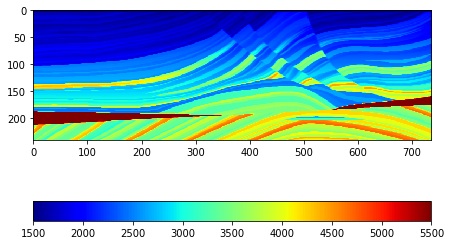

In [9]:
### check velocity-related parameters
plot_check_model(vel, 240, 737)

In [10]:
vel.min()

1500.0

In [11]:
vel.max()

5500.0

In [12]:
v0 = vel / 1000

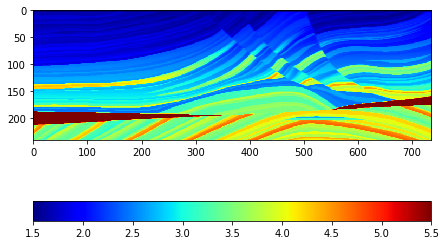

In [13]:
### check velocity-related parameters
plot_check_model(v0, 240, 737)

In [14]:
### Q parameters
iQ0 = 1/60 - (1/60-1/150)*(v0-1.5)/4.0

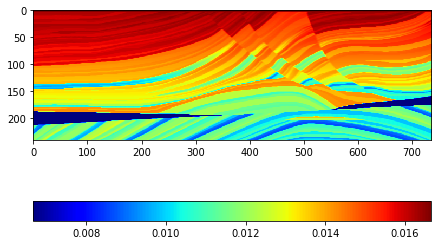

In [15]:
### check velocity-related parameters
plot_check_model(iQ0, 240, 737)

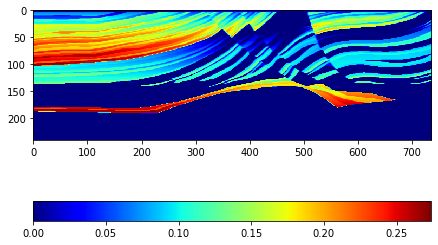

In [16]:
### check velocity-related parameters
plot_check_model(eta, 240, 737)

In [17]:
eta.min()

0.0

In [18]:
eta.max()

0.2739875316619873

In [19]:
etamax = eta.max()

In [20]:
### gamma parameters
gamma = 0.6 - eta / etamax * (0.6-0.3)

In [21]:
gamma.min()

0.3

In [22]:
gamma.max()

0.6

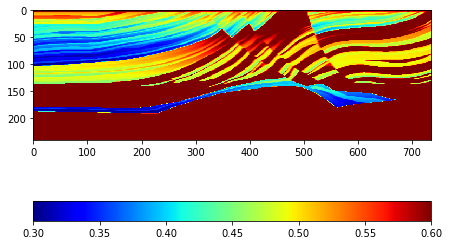

In [23]:
### check velocity-related parameters
plot_check_model(gamma, 240, 737)

### Add PML boundary layers

In [24]:
nx_marm = 737
nz_marm = 240

n_absorb = 40    ## PML layer grid number

nx=nx_marm
nz=nz_marm + 2*n_absorb

print("(nx,nz)=",(nx,nz))

(nx,nz)= (737, 320)


In [25]:
# Definition of modelling parameters
dx   = 50 * 0.005     # grid point distance in x-direction (km)
dz   = dx             # grid point distance in z-direction (km)

In [26]:
#### smoothing 
import scipy.ndimage as ndimg

#### vp0

In [27]:
val    = v0
valmin = val.min()
valmax = val.max()

valtop = val[0,:]
valbot = val[-1,:]

valtop_layer = np.tile(valtop, (n_absorb,1))
valbot_layer = np.tile(valbot, (n_absorb,1))

valnew = np.vstack((valtop_layer, val, valbot_layer))

### smoothing
valtop = ndimg.filters.gaussian_filter(valnew[:40,:], sigma=[15,15])
valbot = ndimg.filters.gaussian_filter(valnew[-40:,:], sigma=[15,15])

valnew[:n_absorb,:]  = valtop
valnew[-n_absorb:,:] = valbot

v0_new = valnew.copy()

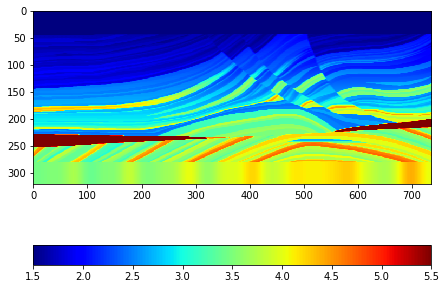

In [28]:
plot_check_model(v0_new, nz, nx)

#### iQ0

In [29]:
val    = iQ0
valmin = val.min()
valmax = val.max()

valtop = val[0,:]
valbot = val[-1,:]

valtop_layer = np.tile(valtop, (n_absorb,1))
valbot_layer = np.tile(valbot, (n_absorb,1))

valnew = np.vstack((valtop_layer, val, valbot_layer))

### smoothing
valtop = ndimg.filters.gaussian_filter(valnew[:40,:], sigma=[15,15])
valbot = ndimg.filters.gaussian_filter(valnew[-40:,:], sigma=[15,15])

valnew[:n_absorb,:]  = valtop
valnew[-n_absorb:,:] = valbot

iQ0_new = valnew.copy()

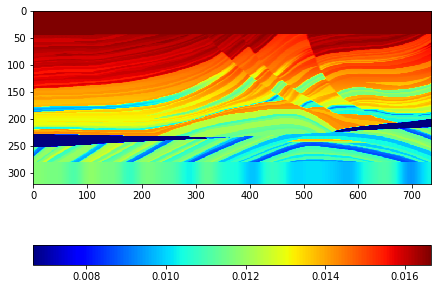

In [30]:
plot_check_model(iQ0_new, nz, nx)

#### Gamma

In [31]:
val    = gamma
valmin = val.min()
valmax = val.max()

valtop = val[0,:]
valbot = val[-1,:]

valtop_layer = np.tile(valtop, (n_absorb,1))
valbot_layer = np.tile(valbot, (n_absorb,1))

valnew = np.vstack((valtop_layer, val, valbot_layer))

### smoothing
valtop = ndimg.filters.gaussian_filter(valnew[:40,:], sigma=[15,15])
valbot = ndimg.filters.gaussian_filter(valnew[-40:,:], sigma=[15,15])

valnew[:n_absorb,:]  = valtop
valnew[-n_absorb:,:] = valbot

gamma_new = valnew.copy()

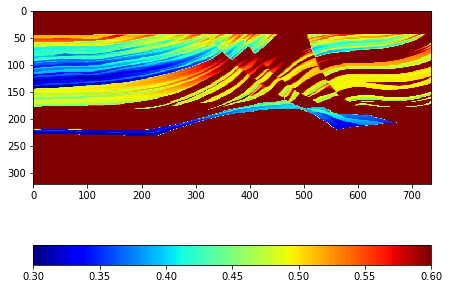

In [32]:
plot_check_model(gamma_new, nz, nx)

In [33]:
### save files
np.save('./model_out/v0_model.npy', v0_new)

np.save('./model_out/iQ0_model.npy', iQ0_new)

np.save('./model_out/gamma_model.npy', gamma_new)

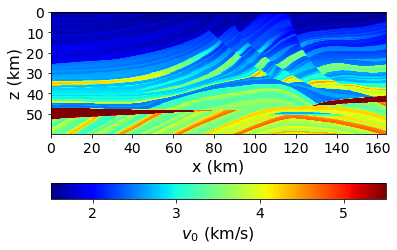

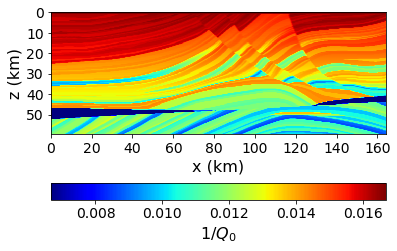

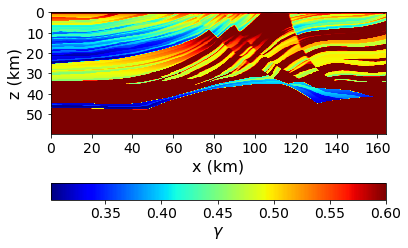

In [34]:
#### plot the models without absorbing boundary layers
nz_range = nz - 2*n_absorb
nx_range = nx - 2*n_absorb

plot_data(v0_new[n_absorb:nz-n_absorb, n_absorb:nx-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)',alpha=0, vrange=[1.5,5.5], barlab="$v_{0}$ (km/s)", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/v0_noPML.pdf')

plot_data(iQ0_new[n_absorb:nz-n_absorb, n_absorb:nx-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)', alpha=0, barlab="$1/Q_{0}$", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/iQ0_noPML.pdf')

plot_data(gamma_new[n_absorb:nz-n_absorb, n_absorb:nx-n_absorb], nz_range, nx_range, dz, dx, \
          zlab='z (km)', xlab='x (km)', alpha=0, barlab="$\gamma$", barhorn=True, shnk=1, fsize=(6, 6), \
          asp=1, allpos=True, color='jet', fname='./figs/gam_noPML.pdf')